# Basic Imports

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  
import pandas as pd

# 1-Importing dataset

In [3]:

df = pd.read_csv('StudentPerformanceFactors.csv')  

df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


# 2- Basic Info and Data Cleaning

In [4]:
print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

Shape: (6607, 20)

Data Types:
 Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object

Missing Values:
 Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    

# 3-: Data Cleaning

In [6]:
df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode()[0], inplace=True)
df['Parental_Education_Level'].fillna(df['Parental_Education_Level'].mode()[0], inplace=True)
df['Distance_from_Home'].fillna(df['Distance_from_Home'].mode()[0], inplace=True)

In [7]:
df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [8]:

df.describe()


,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


# 4- Exploratory Data Analysis (EDA)

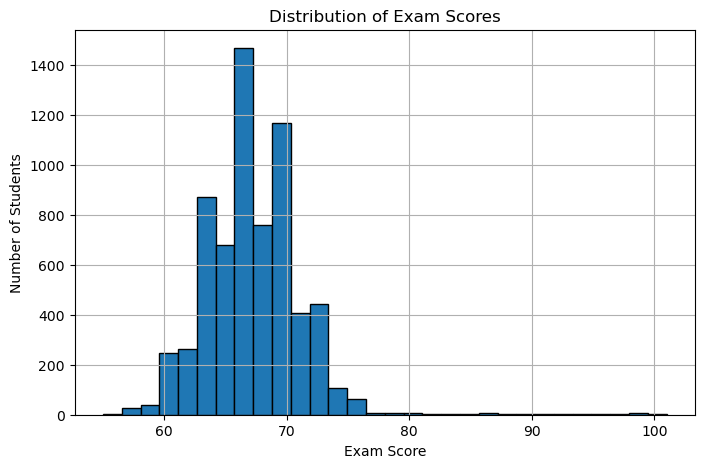

In [72]:

plt.figure(figsize=(8, 5))
plt.hist(df['Exam_Score'], bins=30, edgecolor='black')
plt.title('Distribution of Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Number of Students')
plt.grid(True)
plt.show()


# 5-Correlation Heatmap Plot Code

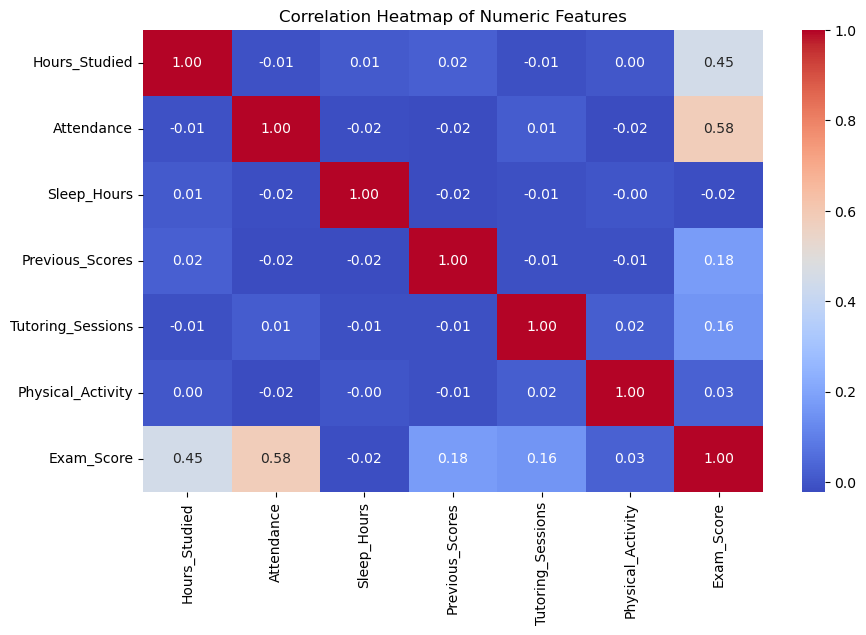

In [10]:

numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Correlation matrix
corr = numeric_df.corr()

# Heatmap plot 
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


# 6-Feature Selection

In [41]:
X = df[['Hours_Studied', 'Attendance', 'Previous_Scores']]
y = df['Exam_Score']

# 7-Train-Test Split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 8-Model training

In [44]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

### Prediction

In [45]:
y_pred = model.predict(X_test)

# 9-Evaluation 

In [70]:

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R² Score:", r2)



MAE: 0.4523920089625993
RMSE: 1.8044445092722843
R² Score: 0.7696495724907311


# 10-Predictions visualize 

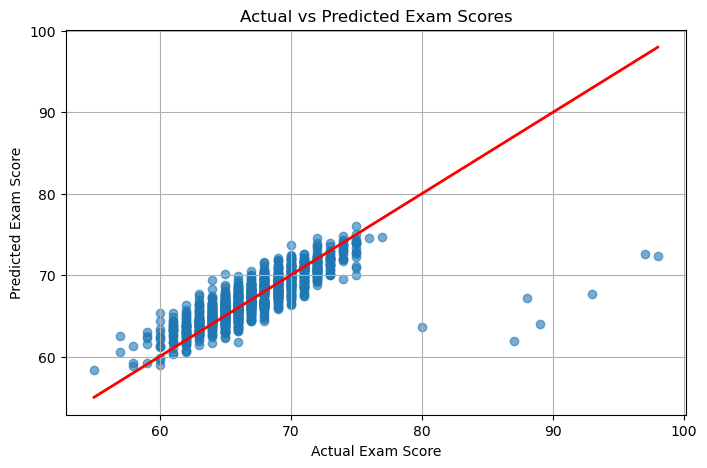

In [55]:

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')
plt.title('Actual vs Predicted Exam Scores')
plt.grid(True)
plt.show()


## NOW Polynomial Regression

In [49]:
degree = 2

poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Model training

In [50]:
# Train karo
poly_model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

# Prediction

In [52]:
y_poly_pred = poly_model.predict(X_test)

# Evaluation

In [53]:

mae_poly = mean_absolute_error(y_test, y_poly_pred)
mse_poly = mean_squared_error(y_test, y_poly_pred)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_poly_pred)

print("Polynomial Regression (Degree 2) Results:")
print("MAE:", mae_poly)
print("RMSE:", rmse_poly)
print("R² Score:", r2_poly)


Polynomial Regression (Degree 2) Results:
MAE: 1.358279215038764
RMSE: 2.31114909125717
R² Score: 0.6221165379802176


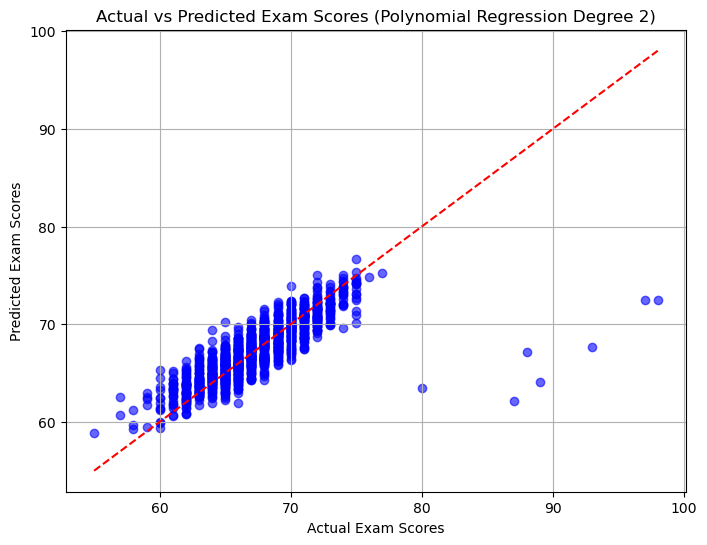

In [56]:

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_poly_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') 
plt.xlabel('Actual Exam Scores')
plt.ylabel('Predicted Exam Scores')
plt.title('Actual vs Predicted Exam Scores (Polynomial Regression Degree 2)')
plt.grid(True)
plt.show()


## Identify categorical columns

In [ ]:

cat_cols = ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities',
            'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality',
            'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level',
            'Distance_from_Home', 'Gender']

# One-hot encoding
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

print(df_encoded.columns)


# Features Selection

In [58]:
X = df_encoded.drop('Exam_Score', axis=1)
y = df_encoded['Exam_Score']

# Train-test split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression model training

In [61]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Predictions

In [62]:
y_pred = model.predict(X_test)

# Evaluation

In [63]:

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("After encoding categorical variables:")
print("MAE:", mae)
print("RMSE:", rmse)
print("R² Score:", r2)


After encoding categorical variables:
MAE: 0.4523920089625993
RMSE: 1.8044445092722843
R² Score: 0.7696495724907311


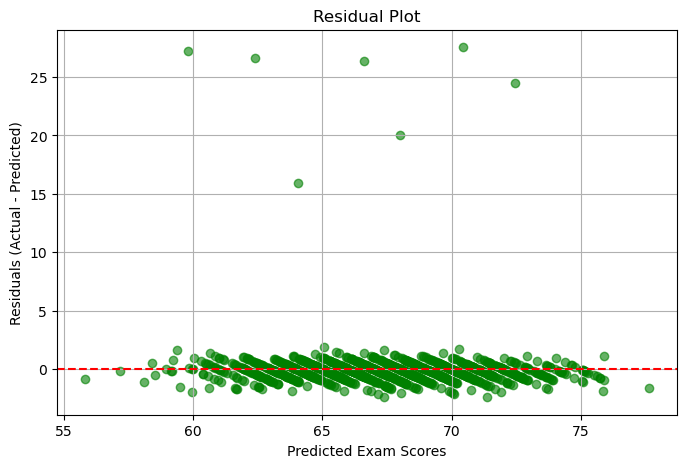

In [33]:

residuals = y_test - y_poly_pred

plt.figure(figsize=(8,5))
plt.scatter(y_poly_pred, residuals, alpha=0.6, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Exam Scores')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')
plt.grid(True)
plt.show()



# Pipeline: polynomial features + linear regression

In [65]:
degree = 2
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

In [66]:
# Train karo
poly_model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [67]:
y_poly_pred = poly_model.predict(X_test)

In [68]:

# Evaluate karo
mae_poly = mean_absolute_error(y_test, y_poly_pred)
mse_poly = mean_squared_error(y_test, y_poly_pred)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_poly_pred)

print("Polynomial Regression (Degree 2) Results after encoding:")
print("MAE:", mae_poly)
print("RMSE:", rmse_poly)
print("R² Score:", r2_poly)


Polynomial Regression (Degree 2) Results after encoding:
MAE: 0.6416656289894989
RMSE: 1.8906266093641024
R² Score: 0.7471205766472551


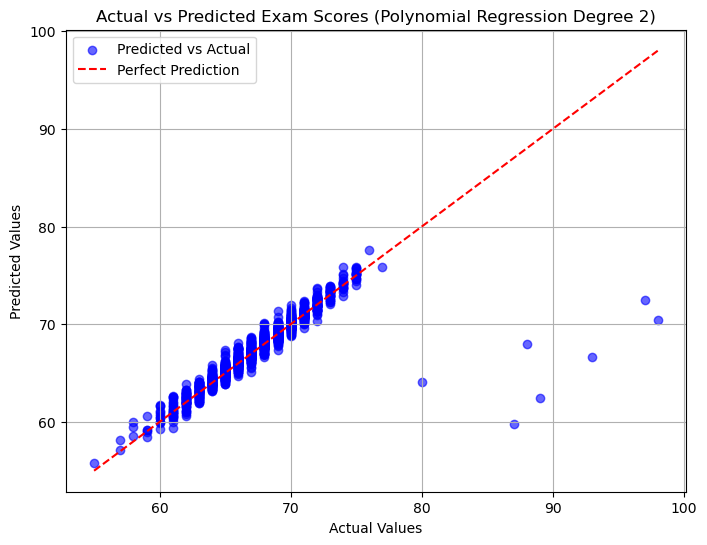

In [69]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_poly_pred, alpha=0.6, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')  # Ideal line

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Exam Scores (Polynomial Regression Degree 2)')
plt.legend()
plt.grid(True)
plt.show()
